# Capítulo 2 - Gradiente Descendente

## Nesse capítulo vamos estudar:

- O conceito de uma Gradiente Descendente.

- Manipulação e visualização de dados.

- Regressão Linear Multivariável usando a Gradiente Descendente.

## 1. O que é uma Descida do Gradiente?

O **Gradiente Descendente** ou Descida do Gradiente, em inglês, *Gradient Descent*, é um método usado para otimizar funções matemáticas. Esse método consiste em avaliar uma função e otimiza-la usando o gradiente dessa função quantas vezes forem nescessárias até achar o seu ponto ótimo.

Por exemplo, nesse caso, vamos usar nossa função de custo MSE para otimizar uma Função Linear ***f(X) = MX + b***, que melhor se adapte à relação dos nossos dados.

O **Gradiente Descendente** é uma das melhores ferramentas para adaptarmos uma função aos nossos dados, principalmente conforme a escala dos nossos dados cresce, visto que uma simples **Equação Normal** tem um custo computacional muito alto com dados muito grandes. Outro ponto positivo do Gradiente Descendente é que é uma forma mais iterativa e interpretável, pois como veremos a seguir, podemos ter uma noção de todos os passos que nosso algoritmo tomou para chegar em uma resposta.

In [34]:
## Primeiramente, vamos verificar nosso ambiente e fazer a importação das bibliotecas nescessárias.

# Vamos usar uma versao do Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)
sys.path.append("..")

# E uma versao da Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Vamos importar Numpy para certos calculos matematicos e Pandas para analize e manipulação de dados.
import numpy as np
import pandas as pd

# Vamos definar a nossa random seed, para que os resultados sejam replicaveis.
np.random.seed(42)

# E finalmente, vamos importar a biblioteca MatplotLib para visualizar os dados.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("seaborn-bright")
mpl.rc('figure', figsize=(10,5))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.facecolor'] = 'whitesmoke'
mpl.rcParams.update({"axes.grid" : True, "grid.color": "grey"})

#Para mostrar ilustracoes
from IPython.display import Image

### Nota: caso haja qualquer dúvida sempre Bibliotecas ou suas funções, as suas documentações estão disponíveis
### no arquivo README.txt. Você também pode usar a função "help(**insira a funcao aqui**)" para ter uma
### explicação detalhada dentro do notebook.

# 2. Conhecendo Nossos Dados

Vamos usar nesse capítulo um conjunto de dados sobre Preço de Habitação. Nesse dataset esta contido uma quantidade determinada de casas, com uma grande quantidade de informações sobre ela, como Área do Lote, Área Habitável, Quantidade de Cômodos, Tipo da Rua, Preço de Venda, etc. Imagine que uma imobiliária nos contratou para conseguir prever o preço de uma casa sem a nescessidade de uma visita de um avaliador. Vamos usar algumas informações desse dateset, para criar um algorítmo capaz de prever seu **Preço de Venda**.

<br>

In [35]:
# Vamos importar nosso dataset e fazer uma rápida analize.

house_prices = pd.read_csv("../datasets/house-prices/train.csv")
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
# Usando a função do Pandas describe() para avaliar diversas métricas estatísticas de cada coluna.
house_prices.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [37]:
# Vamos verificar o tipo de dado de cada coluna e se há dados faltando

house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> Podemos ver que há diversas colunas com dados faltando, isso é um problema que devemos resolver caso decida-se usar essas colunas. De início, vamos usar apenas as informações da coluna "Área Habitavel"(GrLibArea), e compará-la com seus respectivos preços.

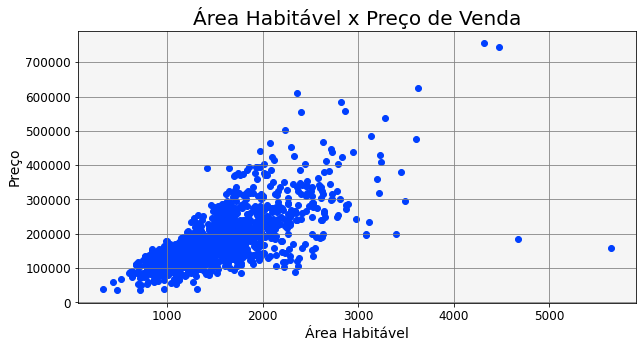

In [38]:
# Plotando um gráfico de Area Habitacional x Preço

X = house_prices.GrLivArea
y = house_prices.SalePrice

plt.title("Área Habitável x Preço de Venda", fontdict = {"fontsize" : 20})
plt.scatter(X, y)
plt.xlabel("Área Habitável")
plt.ylabel("Preço")

plt.show()

>Podemos reparar que há, como se deve imaginar, uma forte relação entre a **Área Habitável** de uma casa com seu respectivo **Preço**. De acordo com nosso gráfico, podemos ver a sua tendência, embora não perfeita, segue um certo padrão ascendente.

# 3. Preparando os Dados

Um Gradiente Descendente é muito sensível aos dados que são utilizados, principalmente à escala dos seus valores. Então vamos usar algumas técnicas para dividir esses dados entre o conjunto de **Treino e Teste** e processar sua escala, para que o nosso vetor de caracteŕisticas tenha a mesma escala que nosso vetor do rótulos.

In [39]:
# Dividindo os dados usando a bibliotaca SKLearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 
#test_size indica a proporcao do cojunto de de testes

## Escalando os Dados

Antes de treinarmos nosso modelo, precisamos padronizar nossos dados. O objetivo da padronização é mudar os valores das colunas numéricas no conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores nem perder informações. Nesse caso, vamos usando o método de **Padronização**, que situa a média dos dados em 0, e seu desvio padrão é igual à 1. Para isso, usamos a fórmulo *z-score*:

# <center>$z(X) = \frac{X-\mu_X}{\sigma_X}$</center>

In [40]:
def padronize(data):
    desvio_padrao = np.std(data)
    media = np.mean(data)
    return (data - media) / desvio_padrao

In [41]:
X_train = padronize(X_train)
X_test = padronize(X_test)
y_train = padronize(y_train)
y_test = padronize(y_test)

>Para evitar a contaminação de qualquer informação do nosso conjunto de treino passe para nosso conjunto de teste, é recomendável sempre, quando usando função transformadoras de dados, usar separadamente para cada conjunto.

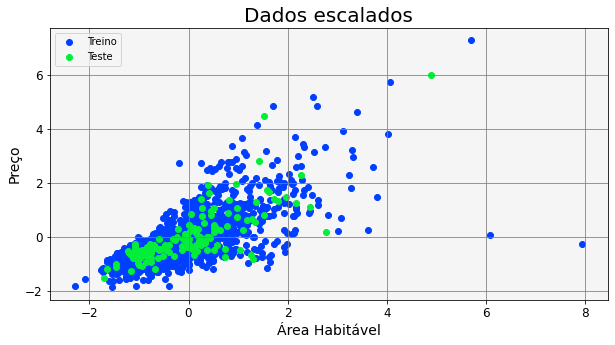

In [42]:
# Vamos plotar o grafico da relacao entre area e preço novamente para checar 
# se houve alteracao das suas caracteristicas ou apenas da suas escala
plt.title("Dados escalados", fontdict={"fontsize":20})
plt.scatter(X_train, y_train, label="Treino")
plt.scatter(X_test, y_test, label="Teste")
plt.legend(loc="upper left")
plt.xlabel("Área Habitável")
plt.ylabel("Preço")
plt.show()

In [43]:
#Antes de treinarmos nosso modelo, precisamos converter nossso vetores que são series do pandas em numpy ndarrays
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy()
X_test = X_test.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy()

>Como podemos ver, nosso conjunto de dados foi devidamente separado e normalizado.

# Regressão Linear usando Gradiente Descendente 

## Como funciona:

1. Contruimos uma Função Linear com parâmetros fúteis, nesse caso, os parâmetros serão todos iguais a 0.

# <center> $\hat{y} = 0X + 0 $ </center>

2. Usando um Função Custo(Loss), para calcular o erro entre a previsão usando nossa Função Linear e os valores reais.

# <center> $L(y, \hat{y}) = (y - \hat{y})² $ </center>

3. Com o total das diferenças computadas, devemos calcular então o vetor gradiente da nossa Função Custo, ou seja, a sua derivada, para descobrirmos em qual direção devemos mudar cada parâmetro da nossa Função Linear para que esse custo encolha.

# <center> $d_W = \frac{\partial{L}}{\partial{W}} = -2 X^T L$ </center>
# <center> $d_b = \frac{\partial{L}}{\partial{b}} = -2 L$ </center>

4. Agora sabemos a direção para onde queremos alterar nossos parâmetros de pesos(W) e viés(b). O próximo passo é subtrair dos  parâmetros originais, esses gradientes.

# <center> $W = W -\alpha .d_W$ </center>
# <center> $b = b -\alpha .d_b$ </center>

*Caso tenho notado, estamos multiplicando nossos gradientes por um coeficiente escalar $\boldsymbol\alpha$. Esse coeficiênte é um hiperparâmetro conhecido como **Learning Rate**, ou Taxa de Aprendizado. Ele nos ajuda à reduzir a escala da mudança dos nossos parâmetros, para que eles não tenham uma mudança muito grande e ultrapasse o ponto ótimo.*

## Ilustrando a idéia:

![]("/images/ilustracao-gd.png")

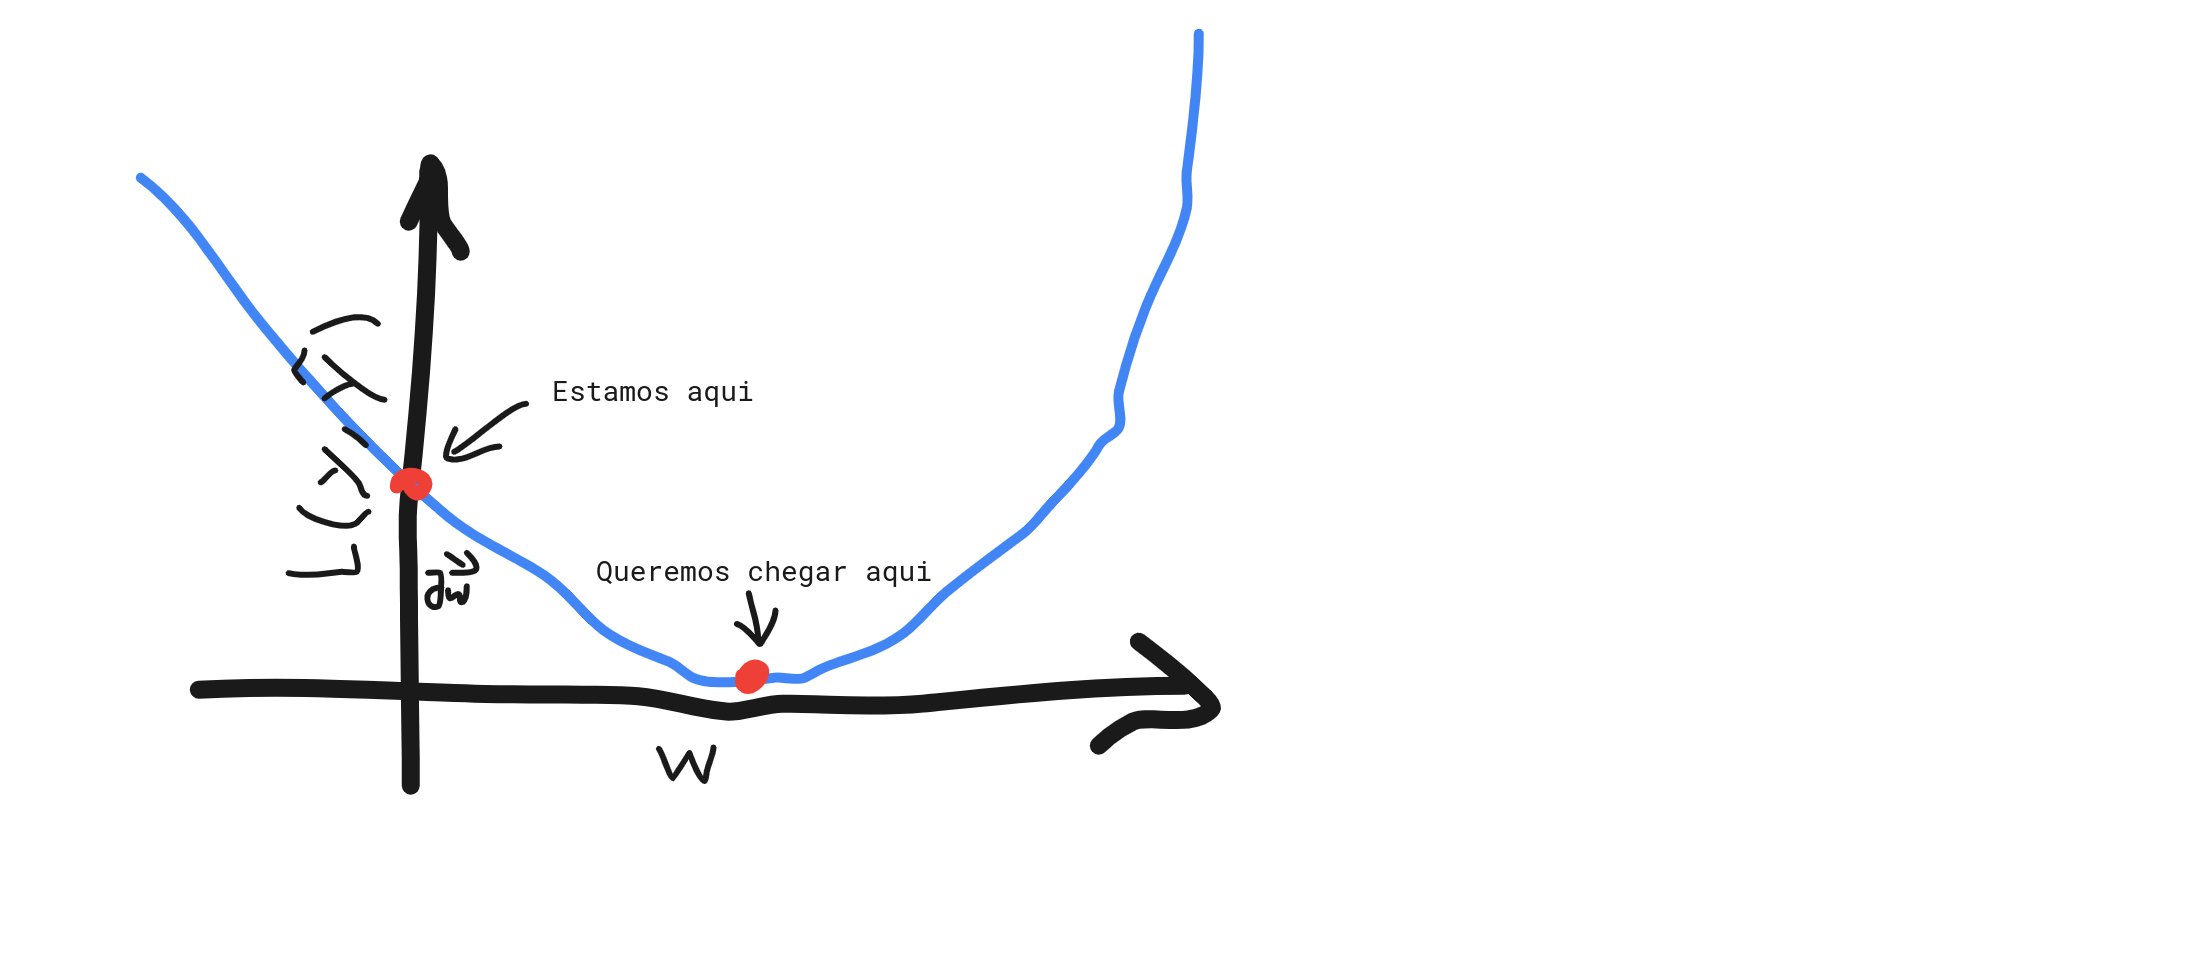

In [44]:
Image(filename="../images/ilustracao-gd.png") #A linha azul é o nossa funcao custo, ou erro.

# 4. Criando Nossos Modelos

Nesse capítulo, vamos treinar três modelos distintos:

- Um modelo de Gradiente Descendente que vamos criar à mão.

- E um modelo de Gradiente Descendente da Scikit-Learn.

- Um modelo da Scikit-Learn que usa a Equação Normal, usando o método Moore-Penrose para calcular o pseudo-inverso da matriz.


## Vamos criar uma classe que possa computar 3 tipos de Gradiente Descendente:

- Gradiente Descendente em Lote(Batch Gradient Descent)

Onde usamos todo o conjunto de dados em cada iteração da nossa Descida do Gradiente.

*É o algorítmo mais preciso, porém computacionalmente o mais lento, pois calcula as derivadas para todo o conjunto de dados em toda a iteração.*

- Gradiente Descendente em Mini-Lote(Mini Batch Gradient Descent)

Onde usamos um lote do conjunto de dados em cada iteração da nossa Descida do Gradiente.

*É mais rápido que o Gradiente Descendente em Lote pois divide os conjunto de dados em lotes ao tamanho escolhido. É um bom meio termo entre o Lote e o Estocástico.*

- Gradiente Descendente Estocástico(Stochastic Gradient Descent)

Onde usamos apenas uma amostra de dados por iteração. Recebe o nome Estocástico, pois teoricamente, essa amostra é escolhida aleatóriamente. Por isso, não é aconselhado o uso em dados cuja ordem seja importante.


In [45]:
class LinearRegressionGD:
    """Essa classe efetua os 3 tipos mais comuns de Gradiente Descendente para uma Regressao Linear.
        - Batch GD: efetua o gradiente para o conjunto total de dados. **batch = True
        - Mini Batch GD: efetua o gradiente descendente para cada parcela do conjunto. **batch = False, batch_size>1
        - GD Estocastico: efetua o gradiente descendente para cada amostra do conjunto de dados. **batch = False, batch_size = 1
    """
    
    def __init__(self, learning_rate = 0.001, max_iter=1000, batch=False, batch_size=3, tol=1e-8):
        self.alpha = learning_rate       # taxa de aprendizado
        self.max_iter = max_iter         # limite maximo de iteracoes
        self.batch = batch               # se True, computa o GD em batch
        self.batch_size = batch_size     # tamanho da parcela para efetuar o GD, se batch_size=1 >> GD Estocastico
        self.scores_log = []             # usaremos essa lista para guardar a pontuacao para cada iteracao
        self.tol = tol                   # Tolerancia para o tamanho da derivada,
                                         #se for muito pequena, a mudanca nos pesos e vies sera insignificante

    def fit(self, X, y):
        """A funcao "fit" e usada para computar os pesos e o vies, seguindo o algoritmo do Gradiente Descendente."""
        # inicio os pesos e o vies (coeficientes e intercepcao), em 0.
        self.weights = np.zeros((X.shape[1])).astype("float64")
        self.bias = 0.
        n_samples = X.shape[0]
        
        X = X.astype("float64")
        y = y.astype("float64")
        
        # caso escolha computar o gradiente descendente em "batch", o tamanho da parcela do conjunto de dados
        # recebe o tamanho do conjunto em si
        if self.batch: 
            self.batch_size = n_samples
        
        #inicio a iteracao, ate atingir a tolerancia ou o max_iter escolhido
        for it in range(self.max_iter): 
            # a variavel "start" e uma ajudante para parcelar o conjunto de dados
            start=0
            
            # inicio a iterar sobre o conjunto de dados 
            for i in range(1, n_samples, self.batch_size):
                X_batch = X[start : self.batch_size + i]
                y_batch = y[start : self.batch_size + i]
                
                #apos retirar uma parcela do conjunto de amostra e de rotulos
                #prevejo o resultado usando a funcao linear
                y_pred = self.predict(X_batch)
                
                #apos a previsao, calcula-se a funcao "loss",
                #que determina a distancia de cada previsao ao seu devido rotulo real
                loss = self.loss(y_batch, y_pred)
                
                #com a funcao "loss" determinada,
                #calcula-se agora as derivadas dos pesos e do vies em relacao a "loss"
                dw = -np.dot(X_batch.T , loss)/self.batch_size #derivada dos pesos 
                db = -np.mean(loss) #derivada do vies
                
                
                #com as derivadas, posso computar os novos pesos e vies
                #os novos pesos sao os pesos antigos + as suas derivadas, multiplicadas pela taxa de aprendizagem
                self.weights -= self.alpha * dw
                self.bias -= self.alpha * db
                                
                start = self.batch_size + i
            
            #adicionamos a media das diferencas ao nosso scores_log
            mae_ = np.mean(np.abs(y-y_pred))
            self.scores_log.append(mae_)
            if it%100==0:
                print(f"MAE na iteração {it}: {mae_}")
            

            #apos cada iteracao, se a derivada dos pesos atingir uma tolerancia minima, o algoritmo e finalizado
            if sum(abs(dw))<self.tol:
                print("Tolerancia atingida na iteracao: ", it)
                break

            
    def predict(self, X):
        """Preve o conjunto de amostras, baseados na funcao linear:
            f(X) = M+X * b
           M = pesos
           b = viez
           
           A funcao, np.dot() efetua o produto escalar do vetor de amostras e o vetor dos pesos.
           Ela e importante pois caso o vetor de amostra tenha mais de uma dimensao, uma multiplicacao simples
           retornaria um resultado errado.
        """
        return np.dot(X , self.weights) + self.bias
    
    def loss(self, y, y_pred):
        """Funcao Loss ou Funcao de Perda, ela nos define a distancia entre os valores previstos e os reais."""
        return y-y_pred


## Treinando nosso modelo.

In [62]:
#Vamos usar nesse exemplo a gradiente descendente em batch,aconselho mudar os parametros e testar os outros
linreg_gd = LinearRegressionGD(learning_rate=0.001, batch=True, max_iter=3000)

#Agora treinamos nosso modelo
linreg_gd.fit(X_train, y_train)

#E com nosso modelo devidamente treinado, vamos fazer uma previsao do precos dados o conjunto teste X
linreg_gd_pred = linreg_gd.predict(X_test) #aqui guardamos nossas previsoes

print(f"Esse modelos nos retorna: \nCoeficiente Linear:{linreg_gd.bias:.5f}\nCoeficiente Angular: {float(linreg_gd.weights):.3f}")

MAE na iteração 0: 0.7289837447385542
MAE na iteração 100: 0.6922623790983365
MAE na iteração 200: 0.6609830192553366
MAE na iteração 300: 0.6339819767440671
MAE na iteração 400: 0.6104156099994184
MAE na iteração 500: 0.5898499530876871
MAE na iteração 600: 0.5716663182100034
MAE na iteração 700: 0.5557533268605744
MAE na iteração 800: 0.5423614544969153
MAE na iteração 900: 0.5314595949509702
MAE na iteração 1000: 0.5225989779869785
MAE na iteração 1100: 0.5152238679803206
MAE na iteração 1200: 0.5092047622486339
MAE na iteração 1300: 0.5043558626634953
MAE na iteração 1400: 0.5003515551130432
MAE na iteração 1500: 0.49700629776896343
MAE na iteração 1600: 0.49440690031058987
MAE na iteração 1700: 0.49228765626581883
MAE na iteração 1800: 0.49055858560242765
MAE na iteração 1900: 0.4890630447829388
MAE na iteração 2000: 0.48786794429618247
MAE na iteração 2100: 0.4869108180364743
MAE na iteração 2200: 0.48613120868993787
MAE na iteração 2300: 0.4855730105510924
MAE na iteração 2400: 

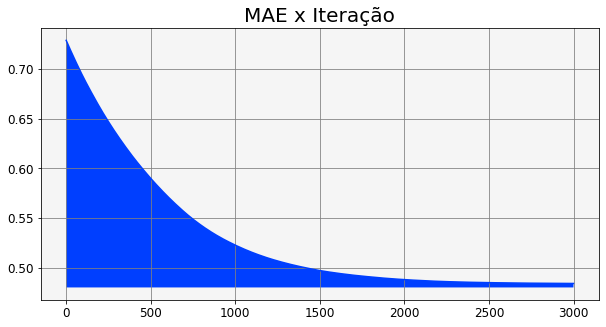

In [47]:
plt.title("MAE x Iteração", fontdict={"fontsize":20})
plt.plot(np.arange(3000), linreg_gd.scores_log)
plt.fill_between(np.arange(3000), 0.48, linreg_gd.scores_log)
plt.show()

## Treinando o modelo de Gradiente Descendente Scikit-Learn

In [48]:
# Vamos testar agora a funcao de gradiente descendente do scikit-learn para compararmos
from sklearn.linear_model import SGDRegressor

sk_linreg_gd = SGDRegressor(max_iter=1000)
sk_linreg_gd.fit(X_train, y_train)
sk_linreg_gd_pred = sk_linreg_gd.predict(X_test)

print(f"Esse modelos nos retorna: \nCoeficiente Linear:{float(sk_linreg_gd.intercept_):.5f}\nCoeficiente Angular: {float(sk_linreg_gd.coef_):.3f}")

Esse modelos nos retorna: 
Coeficiente Linear:-0.00410
Coeficiente Angular: 0.688


## Treinando o modelo de Equação Normal da Scikit-Learn

In [49]:
from sklearn.linear_model import LinearRegression

sk_linreg = LinearRegression(copy_X=True)
sk_linreg.fit(X_train, y_train)
sk_linreg_pred = sk_linreg.predict(X_test)

print(f"Esse modelos nos retorna: \nCoeficiente Linear:{sk_linreg.intercept_}\nCoeficiente Angular: {float(sk_linreg.coef_)}")

Esse modelos nos retorna: 
Coeficiente Linear:-1.8277333071556662e-17
Coeficiente Angular: 0.6983341682272166


## 5. Comparando os Desempenhos

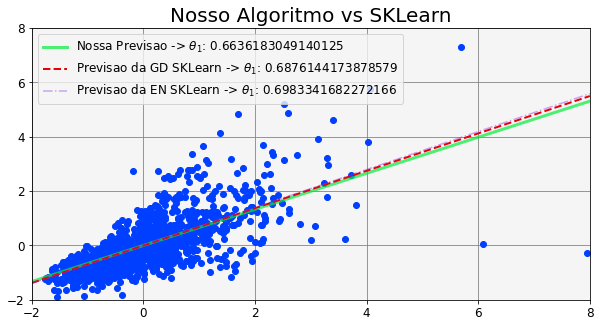

In [50]:
x = np.array([[np.round(X_train.min())], [np.ceil(X_train.max())]])
linreg_x_pred = linreg_gd.predict(x)
sk_linreg_gd_x_pred = sk_linreg_gd.predict(x)
sk_linreg_x_pred = sk_linreg.predict(x)


plt.title("Nosso Algoritmo vs SKLearn", fontdict={"fontsize":20})
plt.plot(X_train, y_train, "o")
plt.plot(x, linreg_x_pred, "-", label="Nossa Previsao -> "+r"$\theta_1$"+": "+str(float(linreg_gd.weights)), lw=3, alpha=0.7)
plt.plot(x, sk_linreg_gd_x_pred, "--", label="Previsao da GD SKLearn -> "+r"$\theta_1$"+": "+str(float(sk_linreg_gd.coef_)), lw=2)
plt.plot(x, sk_linreg_x_pred, ls= "-.", label="Previsao da EN SKLearn -> "+r"$\theta_1$"+": "+str(float(sk_linreg.coef_)), lw=1.5, alpha=0.4)
plt.axis([np.round(X_train.min()),np.ceil(X_train.max()),np.round(y_train.min()) , np.ceil(y_train.max())])

plt.legend(loc="upper left",fontsize=12)
plt.show()

>Podemos notar que nosso algorítmo funcionou como esperado, se igualando aos algorítmos da Scikit-Learn. Vamos dar uma olhada na sua performance.

In [51]:
#As funcoes de pontuacao usadas no capítulo anterior foram alocadas em um modulo chamado de scores.py
from scores import pontuacao
pontuacoes = pontuacao(y_test, linreg_gd_pred, "Regressao Linear GD")
pontuacoes = pontuacoes.append(pontuacao(y_test, sk_linreg_gd_pred, "Regressao Linear GD SKLearn"))
pontuacoes = pontuacoes.append(pontuacao(y_test, sk_linreg_pred, "Regressao Linear SKLearn"))
pontuacoes

,Modelo,R²,MAE,MAPE,MSE,RMSE
0,Regressao Linear GD,0.598,0.400,1.271,0.402,0.634
0,Regressao Linear GD SKLearn,0.603,0.398,1.298,0.397,0.630
0,Regressao Linear SKLearn,0.605,0.398,1.318,0.395,0.629


> Como esperado após observar o gráfico das linhas geradas, as pontuacões são basicamente as mesmas.

# 6. Treinando um Modelo Multivariável

Agora que construimos nosso algorítmo de Gradiente Descendente eficáz, vamos adicionar mais variáveis para verificar se nosso modelo consegue melhorar suas previsões.

In [52]:
# Vamos adicionar Area do Lote e o Ano Construido ao nosso conjunto X e escala-los
X_new = house_prices[["GrLivArea", "LotArea", "YearBuilt"]]

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_new, y, test_size=0.1)

>Uma rapida maneira de padronizar os dados sem tem que criar uma função em todo novo projeto é usar a função de padronizacão "scale" da biblioteca da Scikit-Learn.

In [53]:
from sklearn.preprocessing import scale
new_X_train = scale(new_X_train)
new_X_test = scale(new_X_test)
new_y_train = scale(new_y_train)
new_y_test = scale(new_y_test)

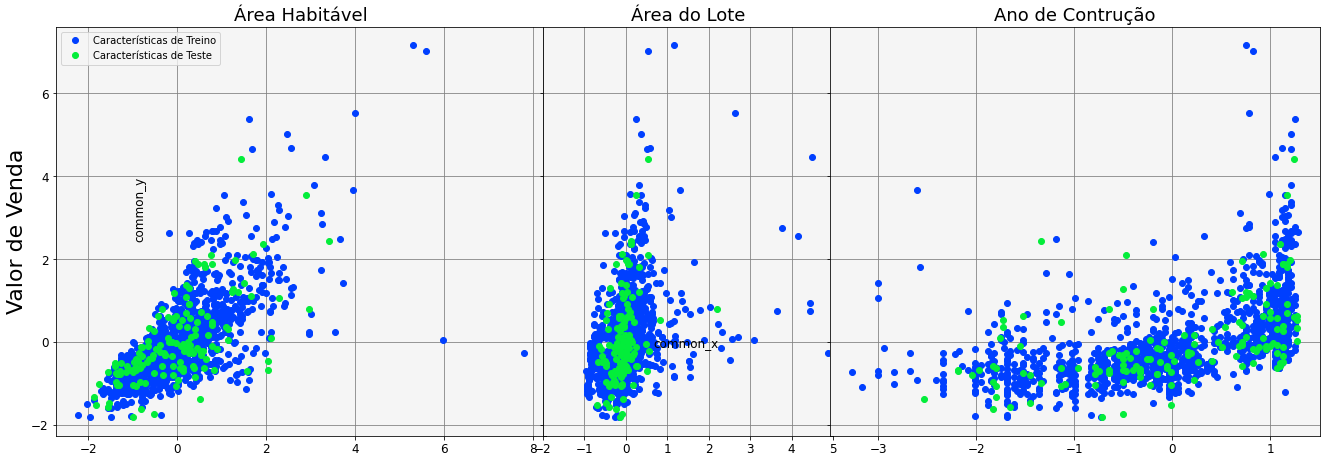

In [63]:
fig, ax = plt.subplots(1,3, sharey=True)   
fig.set_figwidth(16)
fig.set_figheight(4)

ax1, ax2, ax3 = ax


ax1.plot(new_X_train[:,0], new_y_train, "o", label="Características de Treino")
ax1.plot(new_X_test[:,0], new_y_test, "o", label="Características de Teste")
ax1.legend()
ax1.set_title("Área Habitável", fontdict={"fontsize":18})
ax1.set_ylabel("Valor de Venda", fontdict={"fontsize":22})


ax2.plot(new_X_train[:,1], new_y_train, "o", label="Características de Treino")
ax2.plot(new_X_test[:,1], new_y_test, "o", label="Características de Teste")
ax2.set_title("Área do Lote", fontdict={"fontsize":18})
ax2.set_xlim(-2,5)
ax2.set_aspect('equal')

ax3.plot(new_X_train[:,2], new_y_train, "o", label="Características de Treino")
ax3.plot(new_X_test[:,2], new_y_test, "o", label="Características de Teste")
ax3.set_title("Ano de Contrução", fontdict={"fontsize":18})


plt.tight_layout(pad=-5.8)

In [55]:
#Criando nosso novo modelo
new_linreg_gd = LinearRegressionGD(learning_rate=0.01, batch=True, max_iter=1000)

#Treinando com os novos conjuntos de treinamento
new_linreg_gd.fit(new_X_train, new_y_train)

#Obtendo suas predicoes sobre o conjunto de testes
new_linreg_gd_pred = new_linreg_gd.predict(new_X_test)
print(f"Esse modelos nos retorna: \nCoeficiente Linear:{new_linreg_gd.bias}\nCoeficientes Angulares: {new_linreg_gd.weights}")

MAE na iteração 0: 0.7210993246996722
MAE na iteração 100: 0.39024129325059764
MAE na iteração 200: 0.367383089204993
MAE na iteração 300: 0.3695614516008944
MAE na iteração 400: 0.3710436148362301
MAE na iteração 500: 0.37168003385804843
MAE na iteração 600: 0.37192942096059023
MAE na iteração 700: 0.3720298020766426
MAE na iteração 800: 0.3720739113191522
MAE na iteração 900: 0.37209302568553915
Esse modelos nos retorna: 
Coeficiente Linear:-5.549357692462778e-16
Coeficientes Angulares: [0.60503943 0.09644838 0.39699979]


In [56]:
#Adicionando sua pontuacao ao conjunto de pontuacoes
pontuacoes = pontuacoes.append(pontuacao(new_y_test, new_linreg_gd_pred, "Regressao Linear GD com 3 Variáveis"))
pontuacoes

,Modelo,R²,MAE,MAPE,MSE,RMSE
0,Regressao Linear GD,0.598,0.400,1.271,0.402,0.634
0,Regressao Linear GD SKLearn,0.603,0.398,1.298,0.397,0.630
0,Regressao Linear SKLearn,0.605,0.398,1.318,0.395,0.629
0,Regressao Linear GD com 3 Variáveis,0.625,0.445,2.034,0.375,0.612


>Podemos observar que simplismente adicionando novas variáveis melhorou a capacidade preditiva do nosso modelo. E nosso MAPE pode estar sendo afetado por outliers, por isso o grande erro.

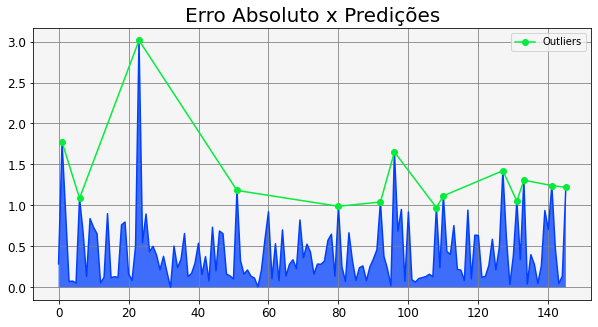

In [57]:
#Adquirindo e ordenando os 14 maiores Outliers do nosso conjunto de erros absolutos 
#Esse passo é totalmente ilustrativo

def picos(a, n=14):
    idx = np.argsort(a)[-n:]
    return idx

def ordenar(x, y):
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    return x, y

erros_abs = abs(new_y_test-new_linreg_gd_pred)
idxs = picos(erros_abs)

top_erros_abs = erros_abs[idxs]
new_xrange = np.arange(0, erros_abs.shape[0])[idxs]

new_xrange, top_erros_abs = ordenar(new_xrange, top_erros_abs)

plt.title("Erro Absoluto x Predições", fontdict={"fontsize": 20})
plt.plot(np.arange(0,erros_abs.shape[0]),erros_abs)
plt.plot(new_xrange, top_erros_abs, marker="o", label="Outliers")
plt.fill_between(np.arange(0,erros_abs.shape[0]), 0.,erros_abs, alpha=0.75)

plt.legend()
plt.show()

# Conclusão

Ao decorrer dos próximos capítulos, vamos notar cada vez mais que o desempenho de um modelo é ditado na maior parte pelos dados usados. Nesse capítulo entendemos o conceito de Gradiente Descendente, e como um exercício, eu te desafio à analizar novamente nosso conjunto de dados e encontrar alguma variável que não foi usada anteriormente e adiciona-la ao novo conjunto de treinamento que melhore ainda mais o desempenho do nosso modelo. Lembre-se de escalar e tratar os dados devidamente.